##Hipótesis sugerida:

“La mortalidad hospitalaria está asociada a factores demográficos (edad, género, zona rural/urbana) y comorbilidades (DM, HTN, CAD, insuficiencia cardíaca), de manera que ciertos perfiles de pacientes presentan mayor riesgo de desenlace negativo.”

##Objetivo del trabajo:

Identificar factores de riesgo que se relacionan con la mortalidad hospitalaria.

Explorar patrones de estancia, enfermedades preexistentes y características demográficas que influyen en la probabilidad de muerte o complicaciones graves.

Generar información preliminar para modelos predictivos de riesgo de mortalidad hospitalaria.

https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import pandas as pd

# Subir primer archivo
uploaded = files.upload()
df1 = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")

# Subir segundo archivo
uploaded = files.upload()
df2 = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")

# Subir tercer archivo
uploaded = files.upload()
df3 = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")

# Subir cuarto archivo
uploaded = files.upload()
df4 = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")


Saving HDHI_Admission_data[1].csv to HDHI_Admission_data[1].csv


Saving HDHI_Mortality_Data[1].csv to HDHI_Mortality_Data[1].csv


Saving HDHI_Pollution_Data[1].csv to HDHI_Pollution_Data[1].csv


Saving table_headings[1].csv to table_headings[1].csv


In [ ]:
print("Columnas df1:", df1.columns.tolist())
print("Columnas df2:", df2.columns.tolist())
print("Columnas df3:", df2.columns.tolist())
print("Columnas df4:", df2.columns.tolist())


Columnas df1: ['ï»¿SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY', 'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']
Columnas df2: ['ï»¿S.NO', 'MRD', 'AGE', 'GENDER ', 'RURAL/URBAN', 'DATE OF BROUGHT DEAD']
Columnas df3: ['ï»¿S.NO', 'MRD', 'AGE', 'GENDER ', 'RURAL/URBAN', 'DATE OF BROUGHT DEAD']
Columnas df4: ['ï»¿S.NO', 'MRD', 'AGE', 'GENDER ', 'RURAL/URBAN', 'DATE OF BROUGHT DEAD']


In [ ]:
# Limpieza de columnas
def limpiar_columnas(df):
    df.columns = df.columns.str.strip()                  # quita espacios
    df.columns = df.columns.str.replace("ï»¿", "", regex=False)
    df.columns = df.columns.str.replace(".", "", regex=False)
    df.columns = df.columns.str.replace("-", "_", regex=False)
    df.columns = df.columns.str.upper()
    return df

df1 = limpiar_columnas(df1)
df2 = limpiar_columnas(df2)
df3 = limpiar_columnas(df3)
df4 = limpiar_columnas(df4)

# Asegurar que la columna clave se llame igual en todos
df1 = df1.rename(columns={"MRD NO": "MRD"})
df2 = df2.rename(columns={"MRD": "MRD"})
df3 = df3.rename(columns={"MRD": "MRD"})
df4 = df4.rename(columns={"MRD": "MRD"})

print("Columnas df1:", df1.columns.tolist())
print("Columnas df2:", df2.columns.tolist())


Columnas df1: ['SNO', 'MRD', 'DOA', 'DOD', 'AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION_EMERGENCY/OPD', 'MONTH YEAR', 'DURATION OF STAY', 'DURATION OF INTENSIVE UNIT STAY', 'OUTCOME', 'SMOKING', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']
Columnas df2: ['SNO', 'MRD', 'AGE', 'GENDER', 'RURAL/URBAN', 'DATE OF BROUGHT DEAD']


In [ ]:
df_brought_dead = pd.concat([df2, df3, df4], ignore_index=True)
df_total = pd.merge(df1, df_brought_dead, on="MRD", how="outer")


##información general

In [ ]:
print("Tamaño del dataset:", df_total.shape)
print("Columnas:", df_total.columns.tolist())
print("\nPrimeras filas:")
display(df_total.head())

print("\nTipos de datos:")
print(df_total.dtypes)

print("\nValores nulos por columna:")
print(df_total.isnull().sum())

Tamaño del dataset: (33197, 90)
Columnas: ['SNO_x', 'MRD', 'DOA', 'DOD', 'AGE_x', 'GENDER_x', 'RURAL', 'TYPE OF ADMISSION_EMERGENCY/OPD', 'MONTH YEAR', 'DURATION OF STAY', 'DURATION OF INTENSIVE UNIT STAY', 'OUTCOME', 'SMOKING', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION', 'SNO_y', 'AGE_y', 'GENDER_y', 'RURAL/URBAN', 'DATE OF BROUGHT DEAD', 'DATE', 'AQI', 'PM25 AVG', 'PM25 MIN', 'PM25 MAX', 'PM10 AVG', 'PM10 MIN', 'PM10 MAX', 'NO2 AVG', 'NO2 MIN', 'NO2 MAX', 'NH3 AVG', 'NH3 MIN', 'NH3 MAX', 'SO2 AVG', 'SO2 MIN', 'SO2 MAX

,SNO_x,MRD,DOA,DOD,AGE_x,GENDER_x,RURAL,TYPE OF ADMISSION_EMERGENCY/OPD,MONTH YEAR,DURATION OF STAY,...,CO MAX,OZONE AVG,OZONE MIN,OZONE MAX,PROMINENT POLLUTENT,MAX TEMP,MIN TEMP,HUMIDITY,TABLE HEADING,EXPLANATORY NAME
0,NaN,***,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6500.0,1006,2/9/2018,4/7/2018,80.0,M,U,E,Feb-18,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9467.0,101169,09/07/2018,18/07/2018,64.0,F,U,O,Jul-18,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6657.0,101189,15/02/2018,15/02/2018,70.0,M,U,O,Feb-18,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1823.0,101322,07/07/2017,08/04/2017,74.0,F,U,E,Jul-17,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tipos de datos:
SNO_x               float64
MRD                  object
DOA                  object
DOD                  object
AGE_x               float64
                     ...   
MAX TEMP            float64
MIN TEMP            float64
HUMIDITY            float64
TABLE HEADING        object
EXPLANATORY NAME     object
Length: 90, dtype: object

Valores nulos por columna:
SNO_x               17439
MRD                 17121
DOA                 17439
DOD                 17439
AGE_x               17439
                    ...  
MAX TEMP            32460
MIN TEMP            32460
HUMIDITY            32464
TABLE HEADING       33139
EXPLANATORY NAME    33140
Length: 90, dtype: int64


##Estadistica descriptiva

In [ ]:
print("\nEstadísticas numéricas:")
display(df_total.describe())


Estadísticas numéricas:


,SNO_x,AGE_x,DURATION OF STAY,DURATION OF INTENSIVE UNIT STAY,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,...,SO2 MIN,SO2 MAX,CO AVG,CO MIN,CO MAX,OZONE AVG,OZONE MIN,MAX TEMP,MIN TEMP,HUMIDITY
count,15758.000000,15758.000000,15758.000000,15758.000000,15758.000000,15758.000000,15758.000000,15758.000000,15758.000000,15758.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,733.000000
mean,7878.935271,61.427212,6.414900,3.803719,0.050324,0.064792,0.323518,0.485848,0.669628,0.154461,...,3.495251,25.234735,35.484396,15.868385,62.305292,22.781547,9.096336,32.260516,20.065129,40.618008
std,4548.661344,13.421085,5.011299,4.015518,0.218619,0.246167,0.467833,0.499816,0.470362,0.361402,...,2.890726,20.600311,14.637934,10.171774,25.485351,13.464316,6.631832,7.471502,7.687235,17.951781
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,5.000000,1.000000,7.000000,3.000000,1.000000,17.000000,5.000000,5.000000
25%,3940.250000,54.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,12.000000,26.000000,8.000000,45.000000,12.000000,4.000000,26.000000,13.000000,26.000000
50%,7878.500000,62.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,20.000000,35.000000,15.000000,57.000000,19.000000,8.000000,34.000000,21.000000,38.000000
75%,11817.750000,70.000000,8.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,5.000000,29.000000,43.000000,23.000000,78.000000,32.000000,11.000000,38.000000,27.000000,54.000000
max,15757.000000,110.000000,98.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,157.000000,100.000000,48.000000,183.000000,78.000000,46.000000,48.000000,34.000000,92.000000


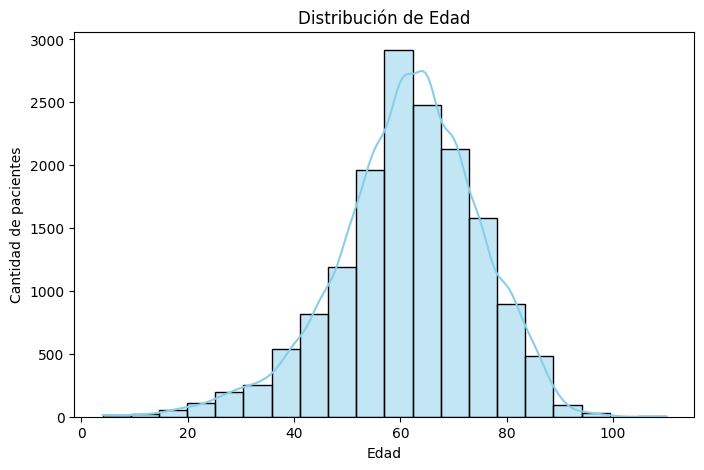

In [ ]:
# 1. Distribución de edad (pacientes operativos)
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df_total['AGE_x'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes")
plt.show()


/tmp/ipython-input-4237052862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENDER_x', data=df_total, palette='pastel')


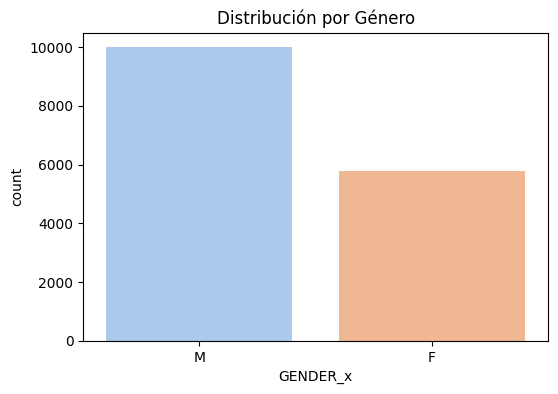

In [ ]:
# 2. Distribución por género (pacientes operativos)
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='GENDER_x', data=df_total, palette='pastel')
plt.title("Distribución por Género")
plt.show()


/tmp/ipython-input-32584618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OUTCOME', data=df_total, palette='Set2')


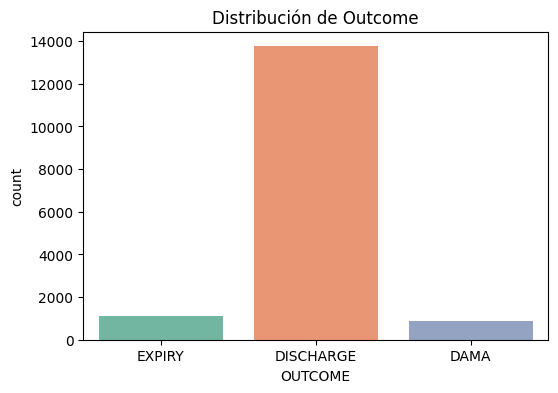

In [ ]:
# 3. Distribución de outcome (si existe)
# -----------------------------
if 'OUTCOME' in df_total.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='OUTCOME', data=df_total, palette='Set2')
    plt.title("Distribución de Outcome")
    plt.show()


/tmp/ipython-input-3822380653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OUTCOME', y='AGE_x', data=df_total, palette='pastel')


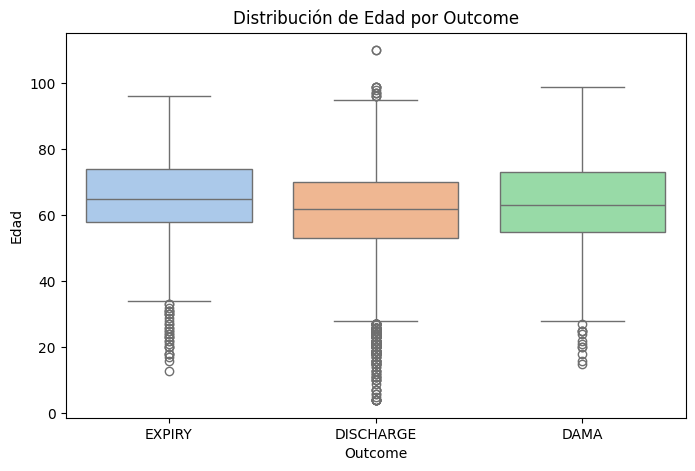

/tmp/ipython-input-3822380653.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OUTCOME', y='DURATION OF STAY', data=df_total, palette='Set2')


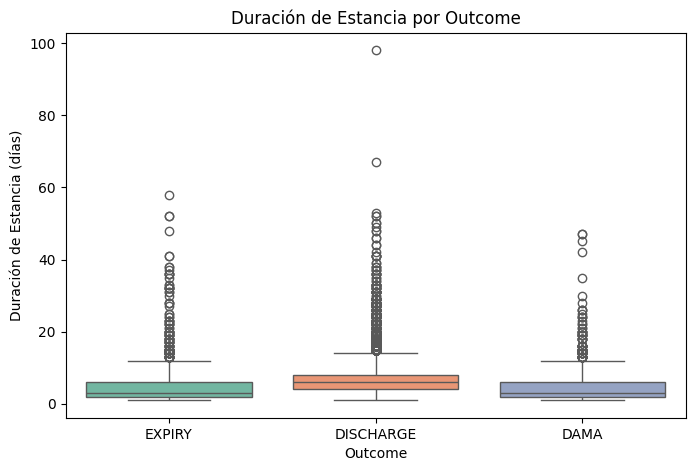

/tmp/ipython-input-3822380653.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CARDIOPATIA', y='AGE_x', data=df_total, palette='coolwarm')


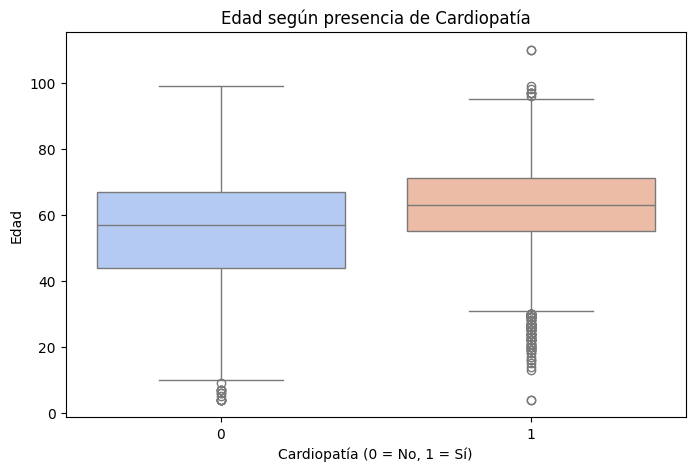

/tmp/ipython-input-3822380653.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DIABETES', y='AGE_x', data=df_total, palette='magma')


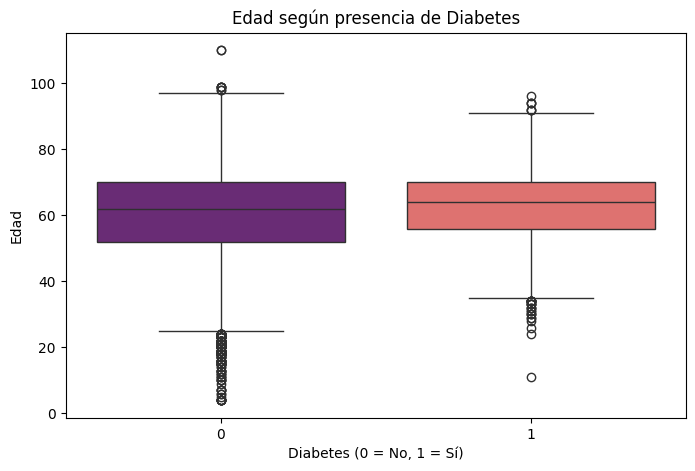

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Boxplot: Edad vs Outcome
# -----------------------------
if 'OUTCOME' in df_total.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='OUTCOME', y='AGE_x', data=df_total, palette='pastel')
    plt.title("Distribución de Edad por Outcome")
    plt.xlabel("Outcome")
    plt.ylabel("Edad")
    plt.show()

# -----------------------------
# 2️⃣ Boxplot: Duración de estancia vs Outcome
# -----------------------------
if 'DURATION OF STAY' in df_total.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='OUTCOME', y='DURATION OF STAY', data=df_total, palette='Set2')
    plt.title("Duración de Estancia por Outcome")
    plt.xlabel("Outcome")
    plt.ylabel("Duración de Estancia (días)")
    plt.show()

# -----------------------------
# 3️⃣ Boxplot: Edad vs Cardiopatía
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='CARDIOPATIA', y='AGE_x', data=df_total, palette='coolwarm')
plt.title("Edad según presencia de Cardiopatía")
plt.xlabel("Cardiopatía (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()

# -----------------------------
# 4️⃣ Boxplot: Edad vs Diabetes (ejemplo de otra comorbilidad)
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='DIABETES', y='AGE_x', data=df_total, palette='magma')
plt.title("Edad según presencia de Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()


In [ ]:
# Clasificación de edad en categorías
def edad_categoria(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Niño'
    elif age < 40:
        return 'Joven'
    elif age < 65:
        return 'Adulto'
    else:
        return 'Mayor'

df_total['AGE_CAT'] = df_total['AGE_x'].apply(edad_categoria)

In [ ]:
# Comorbilidades combinadas (ejemplo: cardiopatía presente)
comorbilidades = ['CAD', 'HEART FAILURE', 'STABLE ANGINA', 'ACS', 'STEMI']
df_total['CARDIOPATIA'] = df_total[comorbilidades].fillna(0).sum(axis=1)
df_total['CARDIOPATIA'] = df_total['CARDIOPATIA'].apply(lambda x: 1 if x>0 else 0)

display(df_total[['AGE_x', 'AGE_CAT', 'CARDIOPATIA']].head())

,AGE_x,AGE_CAT,CARDIOPATIA
0,NaN,Unknown,0
1,80.0,Mayor,1
2,64.0,Adulto,1
3,70.0,Mayor,1
4,74.0,Mayor,1


In [ ]:
# 2️⃣ Diabetes Mellitus (DM)
df_total['DIABETES'] = df_total['DM'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
# 3️⃣ Hipertensión (HTN)
df_total['HIPERTENSION'] = df_total['HTN'].fillna(0).apply(lambda x: 1 if x>0 else 0)


In [ ]:
# 4️⃣ Insuficiencia renal (CKD)
df_total['INSUF_RENAL'] = df_total['CKD'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
# 5️⃣ Enfermedad cerebrovascular (CVA)
cva_cols = ['CVA INFRACT', 'CVA BLEED']
df_total['ENF_CEREBROVASCULAR'] = df_total[cva_cols].fillna(0).sum(axis=1)
df_total['ENF_CEREBROVASCULAR'] = df_total['ENF_CEREBROVASCULAR'].apply(lambda x: 1 if x>0 else 0)


In [ ]:
# 6️⃣ Insuficiencia cardíaca
df_total['INSUF_CARDIACA'] = df_total['HEART FAILURE'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
display(df_total[['AGE_x', 'AGE_CAT', 'CARDIOPATIA', 'DIABETES', 'HIPERTENSION', 'INSUF_RENAL', 'ENF_CEREBROVASCULAR', 'INSUF_CARDIACA']].head())

,AGE_x,AGE_CAT,CARDIOPATIA,DIABETES,HIPERTENSION,INSUF_RENAL,ENF_CEREBROVASCULAR,INSUF_CARDIACA
0,NaN,Unknown,0,0,0,0,0,0
1,80.0,Mayor,1,0,0,0,0,0
2,64.0,Adulto,1,0,1,0,0,0
3,70.0,Mayor,1,0,0,0,0,0
4,74.0,Mayor,1,0,1,0,0,0
